In [1]:
import os
os.chdir("../..")
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from data.gp_dataloader import GPDataGenerator
from data.image_dataloader import ImageDataProcessor, get_masks
from models.anp import ANPModel, train_1d, train_2d
from utils import Attention, plot_np_results

# Set the random seed for reproducibility
torch.manual_seed(1)
np.random.seed(1)

In [2]:
img_size = 32

# MNIST
# trainset_mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.Resize(img_size), transforms.ToTensor()]))
# test_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.Resize(img_size),transforms.ToTensor()]))
# train_mnist, val_mnist = torch.utils.data.random_split(trainset_mnist, [54000, 6000])

# train_mnist_loader = DataLoader(dataset=train_mnist, shuffle=True, batch_size=16)
# val_mnist_loader = DataLoader(dataset=val_mnist, shuffle=False, batch_size=16)
# test_mnist_loader = DataLoader(dataset=test_mnist, shuffle=False, batch_size=1)

# CELEBA
pre_process = transforms.Compose([transforms.Resize(img_size), transforms.CenterCrop(img_size), transforms.ToTensor()])
trainset_celeba = datasets.CelebA(root='./data', split='train', download=False, transform=pre_process)
valid_celeba = datasets.CelebA(root='./data', split='valid', download=False, transform=pre_process)
test_celeba = datasets.CelebA(root='./data', split='test', download=False, transform=pre_process)

train_celeba_loader = DataLoader(dataset=trainset_celeba, shuffle=True, batch_size=16)
val_celeba_loader = DataLoader(dataset=valid_celeba, shuffle=False, batch_size=16)
test_celeba_loader = DataLoader(dataset=test_celeba, shuffle=False, batch_size=1)

train_processor = ImageDataProcessor()
val_processor = ImageDataProcessor(testing=True)

torch.Size([1, 3, 32, 32])


/home/thomas/miniconda3/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


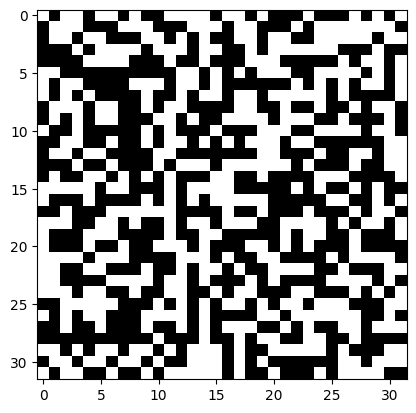

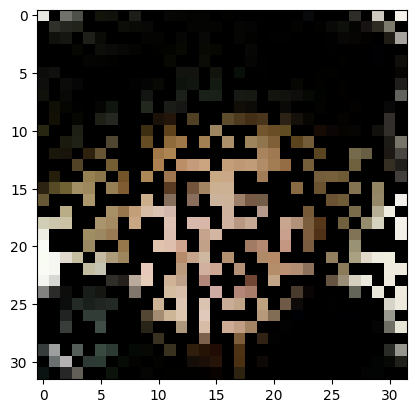

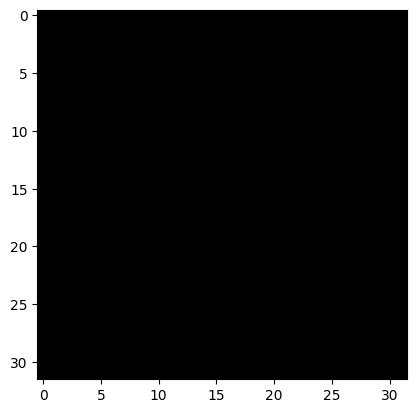

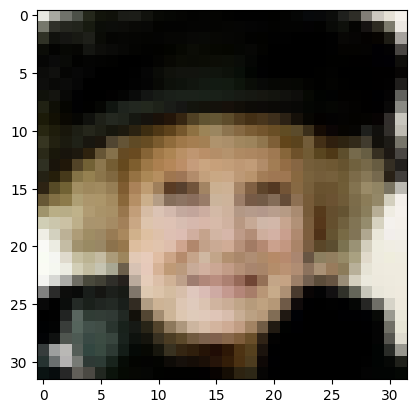

torch.Size([1, 32, 32, 3])


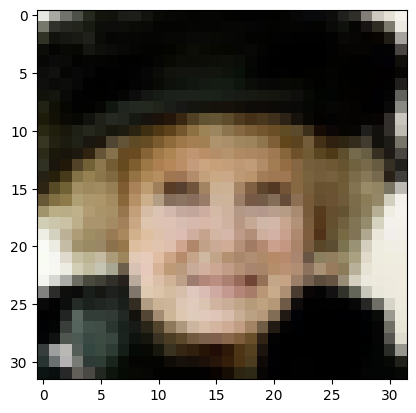

In [3]:

sample_image_batch, _ = next(iter(test_celeba_loader))
print(sample_image_batch.shape)
np_batch, img_batch = val_processor.process_batch(sample_image_batch, 500)
context_x, context_y, target_x, target_y = np_batch.get_all()

context_x_mask, context_y_mask = get_masks(context_x, context_y, img_size, rescale_y=True)
target_x_mask, target_y_mask = get_masks(target_x, target_y, img_size, rescale_y=True)

# plot mask
import matplotlib.pyplot as plt

plt.imshow(context_x_mask[0], cmap='gray')
plt.show()

plt.imshow(context_y_mask[0], cmap='gray')
plt.show()

plt.imshow(target_x_mask[0], cmap='gray')
plt.show()

plt.imshow(target_y_mask[0], cmap='gray')
plt.show()

print(img_batch.shape)
plt.imshow(img_batch[0], cmap='gray')
plt.show()

Using device: cpu
Learning rate: 0.0001
Plotting 3 rows and 4 columns


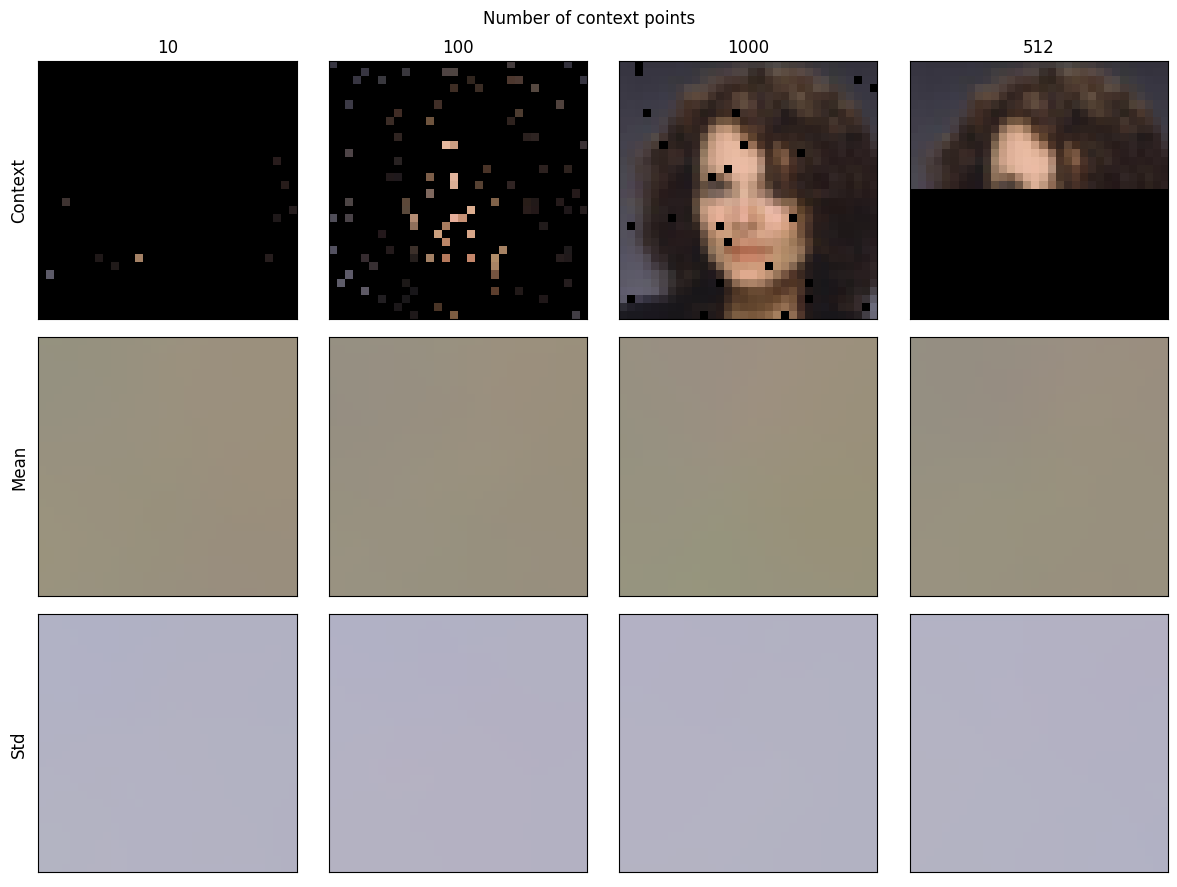

Traceback (most recent call last):
  File "/tmp/ipykernel_24388/3827383017.py", line 5, in <module>
    train_2d(model, train_celeba_loader, val_celeba_loader, epochs=1, lr=1e-4)
  File "/home/thomas/Documents/MPhil MLMI Cambridge/neural-processes/models/anp/train.py", line 185, in train_2d
    *_, log_prob = evaluate(
  File "/home/thomas/Documents/MPhil MLMI Cambridge/neural-processes/models/anp/train.py", line 33, in evaluate
    distrib, pred_y, std, loss, log_prob, _ = model(
  File "/home/thomas/miniconda3/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/thomas/Documents/MPhil MLMI Cambridge/neural-processes/models/anp/ANP.py", line 177, in forward
    r = self.deterministic_encoder(context_x, context_y, target_x)
  File "/home/thomas/miniconda3/lib/python3.9/site-packages/torch/nn/modules/module.py", line 1194, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/thomas/Docu

In [4]:
attention = Attention(attention_type="transformer")
model = ANPModel(x_dim=2, y_dim=3, hidden_dim=128, attention=attention, latent_encoder_layers=6, deterministic_encoder_layers=6, decoder_layers=4, use_self_attention=False)
import traceback
try:
    train_2d(model, train_celeba_loader, val_celeba_loader, epochs=1, lr=1e-4)
except:
    traceback.print_exc()